In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
low_memory=False
%matplotlib notebook
%matplotlib inline



In [4]:
##*ARQUIVO* - Layout caged movimentação
    ##Organizar os sheets do Layout CAGED
        # 'extrai' aba gênero
dfLayoutGenero = pd.read_excel(r'./doc/layouts/Layout Novo Caged Movimentação.xlsx', sheet_name='sexo')
        # 'extrai' ocupação
dfLayoutOcupacao = pd.read_excel(r'./doc/layouts/Layout Novo Caged Movimentação.xlsx', sheet_name='cbo2002ocupação')
        # 'extrai' Nivel de escolaridade
dfLayoutEscolaridade = pd.read_excel(r'./doc/layouts/Layout Novo Caged Movimentação.xlsx', sheet_name='graudeinstrução')
        # 'extrai' Raça
dfLayoutRaca = pd.read_excel(r'./doc/layouts/Layout Novo Caged Movimentação.xlsx', sheet_name='raçacor')
        # extrai a planilha 'Layout'
dfLayout = pd.read_excel(r'./doc/layouts/Layout Novo Caged Movimentação.xlsx', sheet_name='Layout')
# pega layout da planilha de setor
dfLayoutSetor = pd.read_excel(r'./doc/layouts/Layout Novo Caged Movimentação.xlsx', sheet_name='seção')

In [ ]:
#Verificar o dataframe do Layout CAGED
dfLayout

In [ ]:
dfLayoutGenero

In [ ]:
dfLayoutSetor

In [ ]:
dfLayoutEscolaridade

In [ ]:
dfLayoutRaca

In [ ]:
dfLayoutOcupacao

In [5]:
colunas = ['graudeinstrução', 'idade', 'sexo', 'tipomovimentação', 'salário', 'raçacor', 'seção']
##*ARQUIVO DE DADOS DE MOVIMENTAÇÃO 2020* 
movimento2020 = {
    'janeiro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202001.txt', delimiter=';', usecols=colunas),
    'fevereiro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202002.txt', delimiter=';', usecols=colunas),
    'marco':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202003.txt', delimiter=';', usecols=colunas),
    'abril':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202004.txt', delimiter=';', usecols=colunas),
    'maio':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202005.txt', delimiter=';', usecols=colunas),
    'junho':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202006.txt', delimiter=';', usecols=colunas),
    'julho':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202007.txt', delimiter=';', usecols=colunas),
    'agosto':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202008.txt', delimiter=';', usecols=colunas),
    'setembro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202009.txt', delimiter=';', usecols=colunas),
    'outubro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202010.txt', delimiter=';', usecols=colunas),
    'novembro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202011.txt', delimiter=';', usecols=colunas),
    'dezembro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202012.txt', delimiter=';', usecols=colunas)
}

##*ARQUIVO DE DADOS DE MOVIMENTAÇÃO 2021* 
movimento2021 = {
    'janeiro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2021/CAGEDMOV202101.txt', delimiter=';', usecols=colunas),
    'fevereiro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2021/CAGEDMOV202102.txt', delimiter=';', usecols=colunas),
    'marco':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2021/CAGEDMOV202103.txt', delimiter=';', usecols=colunas),
    'abril': pd.read_csv(r'./doc/bases_de_dados/movimentacao/2021/CAGEDMOV202104.txt', delimiter=';', usecols=colunas)
}


In [27]:
#Função para saber se a pessoa foi demitida ou contratada
cod_admitidos = [10,20,25,35,70]
cod_demitidos = [31,32,33,40,43,45,50,60,80,90,98]
def movimento(cod):
    if cod in cod_admitidos:
        return 'admitido'
    elif cod in cod_demitidos:
        return 'demitido'
    else: 
        return False

In [7]:
#Classes sociais de acordo com o IBGE
#https://www.todamateria.com.br/classe-social/
def classes_sociais(salario):
    salario_minimo = 1100
    if(salario>(salario_minimo*20)):
        return 'A'
    elif((salario>(salario_minimo*10))and(salario<=(salario_minimo*20))):
        return 'B'
    elif((salario>(salario_minimo*4))and(salario<=(salario_minimo*10))):
        return 'C'
    elif((salario>(salario_minimo*2))and(salario<=(salario_minimo*4))):
        return 'D'
    elif(salario<=(salario_minimo*2)):
        return 'E'

In [8]:
#Numeração da raça de acordo com o novo Layout dos Microdados do CAGED
def Raca(numRaca):
    if(numRaca == 1):
        return 'Branca'
    elif(numRaca == 2):
        return 'Preta'
    elif(numRaca == 3):
        return 'Parda'
    elif(numRaca == 4):
        return 'Amarela'
    elif(numRaca == 5):
        return 'Indígena'
    elif(numRaca == 6):
        return 'Não informada'
    elif(numRaca == 9):
        return 'Não identificada'

In [9]:
def setor(codigoSetor):
    setor = ""
    if (codigoSetor == "A"):
        setor = "Agricultura, Pecuária, Produção Florestal, Pesca e AqÜIcultura"
    elif (codigoSetor == "B"):
        setor = "Indústrias Extrativas"
    elif (codigoSetor == "C"):
        setor = "Indústrias de Transformação"
    elif (codigoSetor == "D"):
        setor = "Eletricidade e Gás"
    elif (codigoSetor == "E"):
        setor = "Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação"
    elif (codigoSetor == "F"):
        setor = "Construção"
    elif (codigoSetor == "G"):
        setor = "Comércio, Reparação de Veículos Automotores e Motocicletas"
    elif (codigoSetor == "H"):
        setor = "Transporte, Armazenagem e Correio"
    elif (codigoSetor == "I"):
        setor = "Alojamento e Alimentação"
    elif (codigoSetor == "J"):
        setor = "Informação e Comunicação"
    elif (codigoSetor == "K"):
        setor = "Atividades Financeiras, de Seguros e Serviços Relacionados"
    elif (codigoSetor == "L"):
        setor = "Atividades Imobiliárias"
    elif (codigoSetor == "M"):
        setor = "Atividades Profissionais, Científicas e Técnicas"
    elif (codigoSetor == "N"):
        setor = "Atividades Administrativas e Serviços Complementares"
    elif (codigoSetor == "O"):
        setor = "Administração Pública, Defesa e Seguridade Social"
    elif (codigoSetor == "P"):
        setor = "Educação"
    elif (codigoSetor == "Q"):
        setor = "Saúde Humana e Serviços Sociais"
    elif (codigoSetor == "R"):
        setor = "Artes, Cultura, Esporte e Recreação"
    elif (codigoSetor == "S"):
        setor = "Outras Atividades de Serviços"
    elif (codigoSetor == "T"):
        setor = "Serviços Domésticos"
    elif (codigoSetor == "U"):
        setor = "Organismos Internacionais e Outras Instituições Extraterritoriais"
    elif (codigoSetor == "Z"):
        setor = "Não identificado"
    
    return setor

In [10]:
def contagemEmpregoSexo(dic):
    mes = {'mulheres':{'admissoes':0,'demissoes':0,'nao_identificado':0},'homens':{'admissoes':0,'demissoes':0,'nao_identificado':0}}
    for k,v in dic.items():
        if(movimento(k[0])=='admitido'):
            if(k[1]==1):
                mes['homens']['admissoes']+=v 
            if(k[1]==3):
                mes['mulheres']['admissoes']+=v
        elif(movimento(k[0])=='demitido'):
            if(k[1]==1):
                mes['homens']['demissoes']+=v
            if(k[1]==3):
                mes['mulheres']['demissoes']+=v
        else:
            if(k[1]==1):
                mes['homens']['nao_identificado']+=v
            if(k[1]==3):
                mes['mulheres']['nao_identificado']+=v
    return mes

def contagemEmpregoClasseSocial(lista): 
    demitidos = {'A':0,'B':0,'C':0,'D':0,'E':0}
    admitidos = {'A':0,'B':0,'C':0,'D':0,'E':0}
    nao_identificado = {'A':0,'B':0,'C':0,'D':0,'E':0}
    for l in lista:
        if movimento(l['tipomovimentação'])=='admitido':
            if(classes_sociais(l['salário'])=='A'):
                admitidos['A']+=1
            elif(classes_sociais(l['salário'])=='B'):
                admitidos['B']+=1
            elif(classes_sociais(l['salário'])=='C'):
                admitidos['C']+=1
            elif(classes_sociais(l['salário'])=='D'):
                admitidos['D']+=1
            else:
                admitidos['E']+=1
        elif movimento(l['tipomovimentação'])=='demitido':
            if(classes_sociais(l['salário'])=='A'):
                demitidos['A']+=1
            elif(classes_sociais(l['salário'])=='B'):
                demitidos['B']+=1
            elif(classes_sociais(l['salário'])=='C'):
                demitidos['C']+=1
            elif(classes_sociais(l['salário'])=='D'):
                demitidos['D']+=1
            else:
                demitidos['E']+=1
        else:
            if(classes_sociais(l['salário'])=='A'):
                nao_identificado['A']+=1
            elif(classes_sociais(l['salário'])=='B'):
                nao_identificado['B']+=1
            elif(classes_sociais(l['salário'])=='C'):
                nao_identificado['C']+=1
            elif(classes_sociais(l['salário'])=='D'):
                nao_identificado['D']+=1
            else:
                nao_identificado['E']+=1
        
    return {
        'admitidos':admitidos,
        'demitidos':demitidos,
        'nao_identificado':nao_identificado
    }

In [11]:
# pessoas admitidas/demitidas por faixa etária
# fonte para dividir a faixa etária: https://educador.brasilescola.uol.com.br/estrategias-ensino/faixa-etaria-populacao-brasileira.htm
## jovens: idade <= 19
## adultos: idade >= 20 e <= 59
## idosos: idade >= 60

def contagemPorFaixaEtaria (lista):
    demitidos = {'Jovens':0,'Adultos':0,'Idosos':0}
    admitidos = {'Jovens':0,'Adultos':0,'Idosos':0}
    
    for l in lista:
        
        idadeIndividuo = int(l['idade'])
        movimentacao = movimento(l['tipomovimentação'])
        
        if idadeIndividuo <= 19:
            if movimentacao =='admitido':
                admitidos['Jovens'] += 1
            elif movimentacao == 'demitido':
                demitidos['Jovens'] += 1
                
        elif idadeIndividuo >= 20 and idadeIndividuo <= 59:
            if movimentacao == 'admitido':
                admitidos['Adultos'] += 1
            elif movimentacao == 'demitido':
                demitidos['Adultos'] += 1
                
        elif idadeIndividuo >= 60:
            if movimentacao == 'admitido':
                admitidos['Idosos'] += 1
            elif movimentacao == 'demitido':
                demitidos['Idosos'] += 1
                
    return {
        'admitidos': admitidos,
        'demitidos': demitidos
    }

In [ ]:
def contagemPorSetor (lista):
    admitidos = {
        "Agricultura, Pecuária, Produção Florestal, Pesca e AqÜIcultura": 0,
        "Indústrias Extrativas": 0,
        "Indústrias de Transformação": 0,
        "Eletricidade e Gás": 0,
        "Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação": 0,
        "Construção": 0,
        "Comércio, Reparação de Veículos Automotores e Motocicletas": 0,
        "Transporte, Armazenagem e Correio": 0,
        "Alojamento e Alimentação": 0,
        "Informação e Comunicação": 0,
        "Atividades Financeiras, de Seguros e Serviços Relacionados": 0,
        "Atividades Imobiliárias": 0,
        "Atividades Profissionais, Científicas e Técnicas": 0,
        "Atividades Administrativas e Serviços Complementares": 0,
        "Administração Pública, Defesa e Seguridade Social": 0,
        "Educação": 0,
        "Saúde Humana e Serviços Sociais": 0,
        "Artes, Cultura, Esporte e Recreação": 0,
        "Outras Atividades de Serviços": 0,
        "Serviços Domésticos": 0,
        "Organismos Internacionais e Outras Instituições Extraterritoriais": 0,
        "Não identificado": 0
    }
    
    demitidos = {
        "Agricultura, Pecuária, Produção Florestal, Pesca e AqÜIcultura": 0,
        "Indústrias Extrativas": 0,
        "Indústrias de Transformação": 0,
        "Eletricidade e Gás": 0,
        "Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação": 0,
        "Construção": 0,
        "Comércio, Reparação de Veículos Automotores e Motocicletas": 0,
        "Transporte, Armazenagem e Correio": 0,
        "Alojamento e Alimentação": 0,
        "Informação e Comunicação": 0,
        "Atividades Financeiras, de Seguros e Serviços Relacionados": 0,
        "Atividades Imobiliárias": 0,
        "Atividades Profissionais, Científicas e Técnicas": 0,
        "Atividades Administrativas e Serviços Complementares": 0,
        "Administração Pública, Defesa e Seguridade Social": 0,
        "Educação": 0,
        "Saúde Humana e Serviços Sociais": 0,
        "Artes, Cultura, Esporte e Recreação": 0,
        "Outras Atividades de Serviços": 0,
        "Serviços Domésticos": 0,
        "Organismos Internacionais e Outras Instituições Extraterritoriais": 0,
        "Não identificado": 0
    }
    
    for l in lista:
        setorIndividuo = setor(l['seção'])
        movimentacao = movimento(l['tipomovimentação'])
        
        if movimentacao =='admitido':
            admitidos[setorIndividuo] += 1
            
        elif movimentacao == 'demitido':
            demitidos[setorIndividuo] += 1

    return {
        'admitidos': admitidos,
        'demitidos': demitidos
    }

In [ ]:
#função para renderizar o gráfico de emprego de acordo com gênero
def plotGraficoEmpregoGenero(mulheres,homens,label_homens,label_mulheres,xlabel,ylabel,title,tamanhox,tamanhoy,meses):
    barWidth = 0.25
    plt.figure(figsize=(tamanhox,tamanhoy))
    r1 = np.arange(len(mulheres))
    r2 = [x + barWidth for x in r1]
    plt.bar(r1,mulheres,color='#6A5ACD',width=barWidth,label=label_mulheres)
    plt.bar(r2,homens,color='#649AED',width=barWidth,label=label_homens)
    plt.xlabel(xlabel)
    plt.xticks([r + barWidth for r in range(len(mulheres))],meses)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
##Verificar o dataframe do CAGED Movimentação 

#Admissões e demissões por gênero 2020
empregoPorGenero2020 = {}
for mes in movimento2020:
    empregoPorGenero2020[mes]=contagemEmpregoSexo(movimento2020[mes].sample(50).groupby(['tipomovimentação'])['sexo'].value_counts().to_dict())
#Admissões e demissões por gênero 2021 
empregoPorGenero2021 = {}
for mes in movimento2021:
    empregoPorGenero2021[mes]=contagemEmpregoSexo(movimento2021[mes].sample(50).groupby(['tipomovimentação'])['sexo'].value_counts().to_dict())


In [ ]:
#função para renderizar o gráfico de emprego de acordo com a classe social
def plotGraficoEmpregoClasseSocial(lista_A,lista_B,lista_C,lista_D,lista_E,ylabel,xlabel,title,tamanhox,tamanhoy,meses):

    fig, ax = plt.subplots()

    ax.plot(meses, lista_A, lw = 2, alpha = 1,label='A')
    ax.plot(meses, lista_B, lw = 2, alpha = 1,label='B')
    ax.plot(meses, lista_C, lw = 2, alpha = 1,label='C')
    ax.plot(meses, lista_D, lw = 2, alpha = 1,label='D')
    ax.plot(meses, lista_E, lw = 2, alpha = 1,label='E')
    fig.set_size_inches(tamanhox, tamanhoy)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.show()

In [ ]:
def plotGraficoEmpregoSetor (A, B, C, D, E, F, G, H, I, J, K, L, M , N, O, P, Q, R, S, T, U, Z, titulo, tamanhox, tamanhoy, xlabel, ylabel, meses):
    fig, ax = plt.subplots()

    ax.plot(meses, A, lw = 4, alpha = 1, label=setor("A"), color="#F2D502")
    ax.plot(meses, B, lw = 4, alpha = 1, label=setor("B"), color="#03F01A")
    ax.plot(meses, C, lw = 4, alpha = 1, label=setor("C"), color="#008080")
    ax.plot(meses, D, lw = 4, alpha = 1, label=setor("D"), color="#F51C00")
    ax.plot(meses, E, lw = 4, alpha = 1, label=setor("E"), color="#02ED7B")
    ax.plot(meses, F, lw = 4, alpha = 1, label=setor("F"), color="#F5ED8B")
    ax.plot(meses, G, lw = 4, alpha = 1, label=setor("G"), color="#FA8E56")
    ax.plot(meses, H, lw = 4, alpha = 1, label=setor("H"), color="#E07ABF")
    ax.plot(meses, I, lw = 4, alpha = 1, label=setor("I"), color="#95ABFA")
    ax.plot(meses, J, lw = 4, alpha = 1, label=setor("J"), color="#72F098")
    ax.plot(meses, K, lw = 4, alpha = 1, label=setor("K"), color="#E68F15")
    ax.plot(meses, L, lw = 4, alpha = 1, label=setor("L"), color="#F01669")
    ax.plot(meses, M, lw = 4, alpha = 1, label=setor("M"), color="#251ED9")
    ax.plot(meses, N, lw = 4, alpha = 1, label=setor("N"), color="#16F0BB")
    ax.plot(meses, O, lw = 4, alpha = 1, label=setor("O"), color="#D1EB8C")
    ax.plot(meses, P, lw = 4, alpha = 1, label=setor("P"), color="#006400")
    ax.plot(meses, Q, lw = 4, alpha = 1, label=setor("Q"), color="#C213DB")
    ax.plot(meses, R, lw = 4, alpha = 1, label=setor("R"), color="#DB004C")
    ax.plot(meses, S, lw = 4, alpha = 1, label=setor("S"), color="#F0997B")
    ax.plot(meses, T, lw = 4, alpha = 1, label=setor("T"), color="#DAED6D")
    ax.plot(meses, U, lw = 4, alpha = 1, label=setor("U"), color="#EAE8D4")
    ax.plot(meses, Z, lw = 4, alpha = 1, label=setor("Z"), color="#000000")

    fig.set_size_inches(tamanhox, tamanhoy)

    ax.set_title(titulo)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.show()

In [ ]:
#Gŕaficos de Admissões e demissões por gênero 2020 
meses_grafico2020 = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']
mulheres_admitidos2020 = []
mulheres_demitidos2020 = []
homens_admitidos2020 = []
homens_demitidos2020 = []
mulheres_nao_identificado2020 = []
homens_nao_identificado2020 = []

for mes,dic in empregoPorGenero2020.items():
    mulheres_admitidos2020.append(dic['mulheres']['admissoes'])
    homens_admitidos2020.append(dic['homens']['admissoes'])
    mulheres_demitidos2020.append(dic['mulheres']['demissoes'])
    homens_demitidos2020.append(dic['homens']['demissoes'])
    mulheres_nao_identificado2020.append(dic['mulheres']['nao_identificado'])
    homens_nao_identificado2020.append(dic['homens']['nao_identificado'])
plotGraficoEmpregoGenero(mulheres_admitidos2020,homens_admitidos2020,'Homens Admitidos','Mulheres Admitidas','Mês','Pessoas Admitidas','Pessoas admitidas por gênero entre janeiro e dezembro de 2020',20,10,meses_grafico2020)
plotGraficoEmpregoGenero(mulheres_demitidos2020,homens_demitidos2020,'Homens Demitidos','Mulheres Demitidas','Mês','Pessoas Demitidas','Pessoas demitidas por gênero entre janeiro e dezembro de 2020',20,10,meses_grafico2020)
plotGraficoEmpregoGenero(mulheres_demitidos2020,homens_demitidos2020,'Homens','Mulheres','Mês','Pessoas','Pessoas com movimento não identificado por gênero entre janeiro e dezembro de 2020',20,10,meses_grafico2020)



In [ ]:
#Gŕaficos de Admissões e demissões por gênero 2021
meses_grafico2021 = ['Janeiro','Fevereiro','Março','Abril']
mulheres_admitidos2021 = []
mulheres_demitidos2021 = []
homens_admitidos2021 = []
homens_demitidos2021 = []
mulheres_nao_identificado2021 = []
homens_nao_identificado2021 = []

for mes,dic in empregoPorGenero2021.items():
    mulheres_admitidos2021.append(dic['mulheres']['admissoes'])
    homens_admitidos2021.append(dic['homens']['admissoes'])
    mulheres_demitidos2021.append(dic['mulheres']['demissoes'])
    homens_demitidos2021.append(dic['homens']['demissoes'])
    mulheres_nao_identificado2021.append(dic['mulheres']['nao_identificado'])
    homens_nao_identificado2021.append(dic['homens']['nao_identificado'])
plotGraficoEmpregoGenero(mulheres_admitidos2021,homens_admitidos2021,'Homens Admitidos','Mulheres Admitidas','Mês','Pessoas Admitidas','Pessoas admitidas por gênero entre janeiro e abril de 2021',20,10,meses_grafico2021)
plotGraficoEmpregoGenero(mulheres_demitidos2021,homens_demitidos2021,'Homens Demitidos','Mulheres Demitidas','Mês','Pessoas Demitidas','Pessoas demitidas por gênero entre janeiro e abril de 2021',20,10,meses_grafico2021)
plotGraficoEmpregoGenero(mulheres_demitidos2021,homens_demitidos2021,'Homens','Mulheres','Mês','Pessoas','Pessoas com movimento não identificado por gênero entre janeiro e abril de 2021',20,10,meses_grafico2021)


In [ ]:
#função para renderizar o gráfico de emprego de acordo com a classe social
def plotGraficoEmpregoFaixaEtaria(lista_Jovens,lista_Adultos,lista_Idosos,ylabel,xlabel,title,tamanhox,tamanhoy,meses):

    fig, ax = plt.subplots()

    ax.plot(meses, lista_Jovens, lw = 2, alpha = 1,label='Jovens')
    ax.plot(meses, lista_Adultos, lw = 2, alpha = 1,label='Adultos')
    ax.plot(meses, lista_Idosos, lw = 2, alpha = 1,label='Idosos')

    fig.set_size_inches(tamanhox, tamanhoy)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.show()

In [ ]:
#Admissões e demissões por classe social 2020 
empregoPorClasseSocial2020 = {}
for mes in movimento2020:
    empregoPorClasseSocial2020[mes]=contagemEmpregoClasseSocial(movimento2020[mes][['tipomovimentação','salário']].sample(50).to_dict('records'))

#Admissões e demissões por classe social 2021
empregoPorClasseSocial2021 = {} 
for mes in movimento2021:
    empregoPorClasseSocial2021[mes]=contagemEmpregoClasseSocial(movimento2021[mes][['tipomovimentação','salário']].sample(50).to_dict('records'))

In [ ]:
lista_A_admitidos2020 = []
lista_A_demitidos2020 = []
lista_B_admitidos2020 = []
lista_B_demitidos2020 = []
lista_C_admitidos2020 = []
lista_C_demitidos2020 = []
lista_D_admitidos2020 = []
lista_D_demitidos2020 = []
lista_E_admitidos2020 = []
lista_E_demitidos2020 = []
for mes,dic in empregoPorClasseSocial2020.items():
    lista_A_admitidos2020.append(dic['admitidos']['A'])
    lista_A_demitidos2020.append(dic['demitidos']['A'])
    lista_B_admitidos2020.append(dic['admitidos']['B'])
    lista_B_demitidos2020.append(dic['demitidos']['B'])
    lista_C_admitidos2020.append(dic['admitidos']['C'])
    lista_C_demitidos2020.append(dic['demitidos']['C'])
    lista_D_admitidos2020.append(dic['admitidos']['D'])
    lista_D_demitidos2020.append(dic['demitidos']['D'])
    lista_E_admitidos2020.append(dic['admitidos']['E'])
    lista_E_demitidos2020.append(dic['demitidos']['E'])

#gráfico das pessoas admitidas por classe social entre janeiro e dezembro de 2020
plotGraficoEmpregoClasseSocial(
    lista_A_admitidos2020,
    lista_B_admitidos2020,
    lista_C_admitidos2020,
    lista_D_admitidos2020,
    lista_E_admitidos2020,
    'Pessoas','Meses','Pessoas admitidas por classe social entre janeiro e dezembro de 2020',20,10,meses_grafico2020)
#gráfico das pessoas demitidas por classe social entre janeiro e dezembro de 2020
plotGraficoEmpregoClasseSocial(
    lista_A_demitidos2020,
    lista_B_demitidos2020,
    lista_C_demitidos2020,
    lista_D_demitidos2020,
    lista_E_demitidos2020,
    'Pessoas','Meses','Pessoas demitidas por classe social entre janeiro e dezembro de 2020',20,10,meses_grafico2020)

In [ ]:
lista_A_admitidos2021 = []
lista_A_demitidos2021 = []
lista_B_admitidos2021 = []
lista_B_demitidos2021 = []
lista_C_admitidos2021 = []
lista_C_demitidos2021 = []
lista_D_admitidos2021 = []
lista_D_demitidos2021 = []
lista_E_admitidos2021 = []
lista_E_demitidos2021 = []
for mes,dic in empregoPorClasseSocial2021.items():
    lista_A_admitidos2021.append(dic['admitidos']['A'])
    lista_A_demitidos2021.append(dic['demitidos']['A'])
    lista_B_admitidos2021.append(dic['admitidos']['B'])
    lista_B_demitidos2021.append(dic['demitidos']['B'])
    lista_C_admitidos2021.append(dic['admitidos']['C'])
    lista_C_demitidos2021.append(dic['demitidos']['C'])
    lista_D_admitidos2021.append(dic['admitidos']['D'])
    lista_D_demitidos2021.append(dic['demitidos']['D'])
    lista_E_admitidos2021.append(dic['admitidos']['E'])
    lista_E_demitidos2021.append(dic['demitidos']['E'])
#gráfico das pessoas admitidas por classe social entre janeiro e abril de 2021
plotGraficoEmpregoClasseSocial(
    lista_A_admitidos2021,
    lista_B_admitidos2021,
    lista_C_admitidos2021,
    lista_D_admitidos2021,
    lista_E_admitidos2021,
    'Pessoas','Meses','Pessoas admitidas por classe social entre janeiro e abril de 2021',20,10,meses_grafico2021)
#gráfico das pessoas demitidas por classe social entre janeiro e abril de 2021
plotGraficoEmpregoClasseSocial(
    lista_A_demitidos2021,
    lista_B_demitidos2021,
    lista_C_demitidos2021,
    lista_D_demitidos2021,
    lista_E_demitidos2021,
    'Pessoas','Meses','Pessoas demitidas por classe social entre janeiro e abril de 2021',20,10,meses_grafico2021)

In [ ]:
#Admissões e demissões por faixa etária 2020 
empregoPorFaixaEtaria2020 = {}
for mes in movimento2020:
    empregoPorFaixaEtaria2020[mes] = contagemPorFaixaEtaria(movimento2020[mes][['tipomovimentação','idade']].sample(50).to_dict('records'))
    
# admissões e demissões por faixa etária 2021
empregoPorFaixaEtaria2021 = {}
for mes in movimento2021:
    empregoPorFaixaEtaria2021[mes] = contagemPorFaixaEtaria(movimento2021[mes][['tipomovimentação', 'idade']].sample(50).to_dict('records'))


In [ ]:
# admissões e demissões por setor 2020
empregoPorSetor2020 = {}
for mes in movimento2020:
    empregoPorSetor2020[mes] = contagemPorSetor(movimento2020[mes][['tipomovimentação', 'seção']].sample(50).to_dict('records'))

# admissões e demissões por setor 2021
empregoPorSetor2021 = {}
for mes in movimento2021:
    empregoPorSetor2021[mes] = contagemPorSetor(movimento2021[mes][['tipomovimentação', 'seção']].sample(50).to_dict('records'))

In [ ]:
lista_A_setor_admitidos2020 = []
lista_A_setor_demitidos2020 = []
lista_B_setor_admitidos2020 = []
lista_B_setor_demitidos2020 = []
lista_C_setor_admitidos2020 = []
lista_C_setor_demitidos2020 = []
lista_D_setor_admitidos2020 = []
lista_D_setor_demitidos2020 = []
lista_E_setor_admitidos2020 = []
lista_E_setor_demitidos2020 = []
lista_F_setor_admitidos2020 = []
lista_F_setor_demitidos2020 = []
lista_G_setor_admitidos2020 = []
lista_G_setor_demitidos2020 = []
lista_H_setor_admitidos2020 = []
lista_H_setor_demitidos2020 = []
lista_I_setor_admitidos2020 = []
lista_I_setor_demitidos2020 = []
lista_J_setor_admitidos2020 = []
lista_J_setor_demitidos2020 = []
lista_K_setor_admitidos2020 = []
lista_K_setor_demitidos2020 = []
lista_L_setor_admitidos2020 = []
lista_L_setor_demitidos2020 = []
lista_M_setor_admitidos2020 = []
lista_M_setor_demitidos2020 = []
lista_N_setor_admitidos2020 = []
lista_N_setor_demitidos2020 = []
lista_O_setor_admitidos2020 = []
lista_O_setor_demitidos2020 = []
lista_P_setor_admitidos2020 = []
lista_P_setor_demitidos2020 = []
lista_Q_setor_admitidos2020 = []
lista_Q_setor_demitidos2020 = []
lista_R_setor_admitidos2020 = []
lista_R_setor_demitidos2020 = []
lista_S_setor_admitidos2020 = []
lista_S_setor_demitidos2020 = []
lista_T_setor_admitidos2020 = []
lista_T_setor_demitidos2020 = []
lista_U_setor_admitidos2020 = []
lista_U_setor_demitidos2020 = []
lista_Z_setor_admitidos2020 = []
lista_Z_setor_demitidos2020 = []

lista_A_setor_admitidos2021 = []
lista_A_setor_demitidos2021 = []
lista_B_setor_admitidos2021 = []
lista_B_setor_demitidos2021 = []
lista_C_setor_admitidos2021 = []
lista_C_setor_demitidos2021 = []
lista_D_setor_admitidos2021 = []
lista_D_setor_demitidos2021 = []
lista_E_setor_admitidos2021 = []
lista_E_setor_demitidos2021 = []
lista_F_setor_admitidos2021 = []
lista_F_setor_demitidos2021 = []
lista_G_setor_admitidos2021 = []
lista_G_setor_demitidos2021 = []
lista_H_setor_admitidos2021 = []
lista_H_setor_demitidos2021 = []
lista_I_setor_admitidos2021 = []
lista_I_setor_demitidos2021 = []
lista_J_setor_admitidos2021 = []
lista_J_setor_demitidos2021 = []
lista_K_setor_admitidos2021 = []
lista_K_setor_demitidos2021 = []
lista_L_setor_admitidos2021 = []
lista_L_setor_demitidos2021 = []
lista_M_setor_admitidos2021 = []
lista_M_setor_demitidos2021 = []
lista_N_setor_admitidos2021 = []
lista_N_setor_demitidos2021 = []
lista_O_setor_admitidos2021 = []
lista_O_setor_demitidos2021 = []
lista_P_setor_admitidos2021 = []
lista_P_setor_demitidos2021 = []
lista_Q_setor_admitidos2021 = []
lista_Q_setor_demitidos2021 = []
lista_R_setor_admitidos2021 = []
lista_R_setor_demitidos2021 = []
lista_S_setor_admitidos2021 = []
lista_S_setor_demitidos2021 = []
lista_T_setor_admitidos2021 = []
lista_T_setor_demitidos2021 = []
lista_U_setor_admitidos2021 = []
lista_U_setor_demitidos2021 = []
lista_Z_setor_admitidos2021 = []
lista_Z_setor_demitidos2021 = []

for mes in movimento2020:
    lista_A_setor_admitidos2020.append(empregoPorSetor2020[mes]['admitidos'][setor("A")])
    lista_A_setor_demitidos2020.append(empregoPorSetor2020[mes]['demitidos'][setor("A")])
    lista_B_setor_admitidos2020.append(empregoPorSetor2020[mes]['admitidos'][setor("B")])
    lista_B_setor_demitidos2020.append(empregoPorSetor2020[mes]['demitidos'][setor("B")])
    lista_C_setor_admitidos2020.append(empregoPorSetor2020[mes]['admitidos'][setor("C")])
    lista_C_setor_demitidos2020.append(empregoPorSetor2020[mes]['demitidos'][setor("C")])
    lista_D_setor_admitidos2020.append(empregoPorSetor2020[mes]['admitidos'][setor("D")])
    lista_D_setor_demitidos2020.append(empregoPorSetor2020[mes]['demitidos'][setor("D")])
    lista_E_setor_admitidos2020.append(empregoPorSetor2020[mes]['admitidos'][setor("E")])
    lista_E_setor_demitidos2020.append(empregoPorSetor2020[mes]['demitidos'][setor("E")])
    lista_F_setor_admitidos2020.append(empregoPorSetor2020[mes]['admitidos'][setor("F")])
    lista_F_setor_demitidos2020.append(empregoPorSetor2020[mes]['demitidos'][setor("F")])
    lista_G_setor_admitidos2020.append(empregoPorSetor2020[mes]['admitidos'][setor("G")])
    lista_G_setor_demitidos2020.append(empregoPorSetor2020[mes]['demitidos'][setor("G")])
    lista_H_setor_admitidos2020.append(empregoPorSetor2020[mes]['admitidos'][setor("H")])
    lista_H_setor_demitidos2020.append(empregoPorSetor2020[mes]['demitidos'][setor("H")])
    lista_I_setor_admitidos2020.append(empregoPorSetor2020[mes]['admitidos'][setor("I")])
    lista_I_setor_demitidos2020.append(empregoPorSetor2020[mes]['demitidos'][setor("I")])
    lista_J_setor_admitidos2020.append(empregoPorSetor2020[mes]['admitidos'][setor("J")])
    lista_J_setor_demitidos2020.append(empregoPorSetor2020[mes]['demitidos'][setor("J")])
    lista_K_setor_admitidos2020.append(empregoPorSetor2020[mes]['admitidos'][setor("K")])
    lista_K_setor_demitidos2020.append(empregoPorSetor2020[mes]['demitidos'][setor("K")])
    lista_L_setor_admitidos2020.append(empregoPorSetor2020[mes]['admitidos'][setor("L")])
    lista_L_setor_demitidos2020.append(empregoPorSetor2020[mes]['demitidos'][setor("L")])
    lista_M_setor_admitidos2020.append(empregoPorSetor2020[mes]['admitidos'][setor("M")])
    lista_M_setor_demitidos2020.append(empregoPorSetor2020[mes]['demitidos'][setor("M")])
    lista_N_setor_admitidos2020.append(empregoPorSetor2020[mes]['admitidos'][setor("N")])
    lista_N_setor_demitidos2020.append(empregoPorSetor2020[mes]['demitidos'][setor("N")])
    lista_O_setor_admitidos2020.append(empregoPorSetor2020[mes]['admitidos'][setor("O")])
    lista_O_setor_demitidos2020.append(empregoPorSetor2020[mes]['demitidos'][setor("O")])
    lista_P_setor_admitidos2020.append(empregoPorSetor2020[mes]['admitidos'][setor("P")])
    lista_P_setor_demitidos2020.append(empregoPorSetor2020[mes]['demitidos'][setor("P")])
    lista_Q_setor_admitidos2020.append(empregoPorSetor2020[mes]['admitidos'][setor("Q")])
    lista_Q_setor_demitidos2020.append(empregoPorSetor2020[mes]['demitidos'][setor("Q")])
    lista_R_setor_admitidos2020.append(empregoPorSetor2020[mes]['admitidos'][setor("R")])
    lista_R_setor_demitidos2020.append(empregoPorSetor2020[mes]['demitidos'][setor("R")])
    lista_S_setor_admitidos2020.append(empregoPorSetor2020[mes]['admitidos'][setor("S")])
    lista_S_setor_demitidos2020.append(empregoPorSetor2020[mes]['demitidos'][setor("S")])
    lista_T_setor_admitidos2020.append(empregoPorSetor2020[mes]['admitidos'][setor("T")])
    lista_T_setor_demitidos2020.append(empregoPorSetor2020[mes]['demitidos'][setor("T")])
    lista_U_setor_admitidos2020.append(empregoPorSetor2020[mes]['admitidos'][setor("U")])
    lista_U_setor_demitidos2020.append(empregoPorSetor2020[mes]['demitidos'][setor("U")])
    lista_Z_setor_admitidos2020.append(empregoPorSetor2020[mes]['admitidos'][setor("Z")])
    lista_Z_setor_demitidos2020.append(empregoPorSetor2020[mes]['demitidos'][setor("Z")])

for mes in movimento2021:
    lista_A_setor_admitidos2021.append(empregoPorSetor2021[mes]['admitidos'][setor("A")])
    lista_A_setor_demitidos2021.append(empregoPorSetor2021[mes]['demitidos'][setor("A")])
    lista_B_setor_admitidos2021.append(empregoPorSetor2021[mes]['admitidos'][setor("B")])
    lista_B_setor_demitidos2021.append(empregoPorSetor2021[mes]['demitidos'][setor("B")])
    lista_C_setor_admitidos2021.append(empregoPorSetor2021[mes]['admitidos'][setor("C")])
    lista_C_setor_demitidos2021.append(empregoPorSetor2021[mes]['demitidos'][setor("C")])
    lista_D_setor_admitidos2021.append(empregoPorSetor2021[mes]['admitidos'][setor("D")])
    lista_D_setor_demitidos2021.append(empregoPorSetor2021[mes]['demitidos'][setor("D")])
    lista_E_setor_admitidos2021.append(empregoPorSetor2021[mes]['admitidos'][setor("E")])
    lista_E_setor_demitidos2021.append(empregoPorSetor2021[mes]['demitidos'][setor("E")])
    lista_F_setor_admitidos2021.append(empregoPorSetor2021[mes]['admitidos'][setor("F")])
    lista_F_setor_demitidos2021.append(empregoPorSetor2021[mes]['demitidos'][setor("F")])
    lista_G_setor_admitidos2021.append(empregoPorSetor2021[mes]['admitidos'][setor("G")])
    lista_G_setor_demitidos2021.append(empregoPorSetor2021[mes]['demitidos'][setor("G")])
    lista_H_setor_admitidos2021.append(empregoPorSetor2021[mes]['admitidos'][setor("H")])
    lista_H_setor_demitidos2021.append(empregoPorSetor2021[mes]['demitidos'][setor("H")])
    lista_I_setor_admitidos2021.append(empregoPorSetor2021[mes]['admitidos'][setor("I")])
    lista_I_setor_demitidos2021.append(empregoPorSetor2021[mes]['demitidos'][setor("I")])
    lista_J_setor_admitidos2021.append(empregoPorSetor2021[mes]['admitidos'][setor("J")])
    lista_J_setor_demitidos2021.append(empregoPorSetor2021[mes]['demitidos'][setor("J")])
    lista_K_setor_admitidos2021.append(empregoPorSetor2021[mes]['admitidos'][setor("K")])
    lista_K_setor_demitidos2021.append(empregoPorSetor2021[mes]['demitidos'][setor("K")])
    lista_L_setor_admitidos2021.append(empregoPorSetor2021[mes]['admitidos'][setor("L")])
    lista_L_setor_demitidos2021.append(empregoPorSetor2021[mes]['demitidos'][setor("L")])
    lista_M_setor_admitidos2021.append(empregoPorSetor2021[mes]['admitidos'][setor("M")])
    lista_M_setor_demitidos2021.append(empregoPorSetor2021[mes]['demitidos'][setor("M")])
    lista_N_setor_admitidos2021.append(empregoPorSetor2021[mes]['admitidos'][setor("N")])
    lista_N_setor_demitidos2021.append(empregoPorSetor2021[mes]['demitidos'][setor("N")])
    lista_O_setor_admitidos2021.append(empregoPorSetor2021[mes]['admitidos'][setor("O")])
    lista_O_setor_demitidos2021.append(empregoPorSetor2021[mes]['demitidos'][setor("O")])
    lista_P_setor_admitidos2021.append(empregoPorSetor2021[mes]['admitidos'][setor("P")])
    lista_P_setor_demitidos2021.append(empregoPorSetor2021[mes]['demitidos'][setor("P")])
    lista_Q_setor_admitidos2021.append(empregoPorSetor2021[mes]['admitidos'][setor("Q")])
    lista_Q_setor_demitidos2021.append(empregoPorSetor2021[mes]['demitidos'][setor("Q")])
    lista_R_setor_admitidos2021.append(empregoPorSetor2021[mes]['admitidos'][setor("R")])
    lista_R_setor_demitidos2021.append(empregoPorSetor2021[mes]['demitidos'][setor("R")])
    lista_S_setor_admitidos2021.append(empregoPorSetor2021[mes]['admitidos'][setor("S")])
    lista_S_setor_demitidos2021.append(empregoPorSetor2021[mes]['demitidos'][setor("S")])
    lista_T_setor_admitidos2021.append(empregoPorSetor2021[mes]['admitidos'][setor("T")])
    lista_T_setor_demitidos2021.append(empregoPorSetor2021[mes]['demitidos'][setor("T")])
    lista_U_setor_admitidos2021.append(empregoPorSetor2021[mes]['admitidos'][setor("U")])
    lista_U_setor_demitidos2021.append(empregoPorSetor2021[mes]['demitidos'][setor("U")])
    lista_Z_setor_admitidos2021.append(empregoPorSetor2021[mes]['admitidos'][setor("Z")])
    lista_Z_setor_demitidos2021.append(empregoPorSetor2021[mes]['demitidos'][setor("Z")])
    
# grafico pessoas admitidos por setor em 2020
plotGraficoEmpregoSetor (lista_A_setor_admitidos2020,
                         lista_B_setor_admitidos2020,
                         lista_C_setor_admitidos2020,
                         lista_D_setor_admitidos2020,
                         lista_E_setor_admitidos2020,
                         lista_F_setor_admitidos2020,
                         lista_G_setor_admitidos2020,
                         lista_H_setor_admitidos2020,
                         lista_I_setor_admitidos2020,
                         lista_J_setor_admitidos2020,
                         lista_K_setor_admitidos2020,
                         lista_L_setor_admitidos2020,
                         lista_M_setor_admitidos2020,
                         lista_N_setor_admitidos2020,
                         lista_O_setor_admitidos2020,
                         lista_P_setor_admitidos2020,
                         lista_Q_setor_admitidos2020,
                         lista_R_setor_admitidos2020,
                         lista_S_setor_admitidos2020,
                         lista_T_setor_admitidos2020,
                         lista_U_setor_admitidos2020,
                         lista_Z_setor_admitidos2020,
                         "Pessoas admitidas por setor entre janeiro e dezembro de 2020",
                         20,
                         30,
                         'Meses',
                         'Pessoas',
                         meses_grafico2020)

# grafico pessoas admitidos por setor em 2020

# grafico pessoas admitidos por setor em 2021

# grafico pessoas demitidas por setor em 2021

In [ ]:
lista_Jovens_admitidos2020 = []
lista_Jovens_demitidos2020 = []
lista_Adultos_admitidos2020 = []
lista_Adultos_demitidos2020 = []
lista_Idosos_admitidos2020 = []
lista_Idosos_demitidos2020 = []

lista_Jovens_admitidos2021 = []
lista_Jovens_demitidos2021 = []
lista_Adultos_admitidos2021 = []
lista_Adultos_demitidos2021 = []
lista_Idosos_admitidos2021 = []
lista_Idosos_demitidos2021 = []

for mes,dic in empregoPorFaixaEtaria2020.items():
    lista_Jovens_admitidos2020.append(dic['admitidos']['Jovens'])
    lista_Jovens_demitidos2020.append(dic['demitidos']['Jovens'])
    lista_Adultos_admitidos2020.append(dic['admitidos']['Adultos'])
    lista_Adultos_demitidos2020.append(dic['demitidos']['Adultos'])
    lista_Idosos_admitidos2020.append(dic['admitidos']['Idosos'])
    lista_Idosos_demitidos2020.append(dic['demitidos']['Idosos'])
    
for mes,dic in empregoPorFaixaEtaria2021.items():
    lista_Jovens_admitidos2021.append(dic['admitidos']['Jovens'])
    lista_Jovens_demitidos2021.append(dic['demitidos']['Jovens'])
    lista_Adultos_admitidos2021.append(dic['admitidos']['Adultos'])
    lista_Adultos_demitidos2021.append(dic['demitidos']['Adultos'])
    lista_Idosos_admitidos2021.append(dic['admitidos']['Idosos'])
    lista_Idosos_demitidos2021.append(dic['demitidos']['Idosos'])

# grafico pessoas admitidos por faixa etaria em 2020
plotGraficoEmpregoFaixaEtaria(lista_Jovens_admitidos2020,lista_Adultos_admitidos2020,lista_Idosos_admitidos2020,'Pessoas','Meses','Pessoas admitidas por faixa etária entre janeiro e dezembro de 2020',20,10,meses_grafico2020)

# grafico pessoas admitidos por faixa etaria em 2020
plotGraficoEmpregoFaixaEtaria(lista_Jovens_demitidos2020,lista_Adultos_demitidos2020,lista_Idosos_demitidos2020,'Pessoas','Meses','Pessoas demitidas por faixa etária entre janeiro e dezembro de 2020',20,10,meses_grafico2020)

# grafico pessoas admitidos por faixa etaria em 2021
plotGraficoEmpregoFaixaEtaria(lista_Jovens_admitidos2021,lista_Adultos_admitidos2021,lista_Idosos_admitidos2021,'Pessoas','Meses','Pessoas admitidas por faixa etária entre janeiro e abril de 2021',20,10,meses_grafico2021)

# grafico pessoas demitidas por faixa etaria em 2021
plotGraficoEmpregoFaixaEtaria(lista_Jovens_demitidos2021,lista_Adultos_demitidos2021,lista_Idosos_demitidos2021,'Pessoas','Meses','Pessoas demitidas por faixa etária entre janeiro e abril de 2021',20,10,meses_grafico2021)

In [ ]:
#*Média salárial por raça*
Branca = {'salario':0 , 'quantidade':0, 'media':0}
Preta = {'salario':0 , 'quantidade':0, 'media':0}
Parda = {'salario':0 , 'quantidade':0, 'media':0}
Amarela = {'salario':0 , 'quantidade':0, 'media':0}
Indigena = {'salario':0 , 'quantidade':0, 'media':0}
Nao_informada = {'salario':0 , 'quantidade':0, 'media':0}
Nao_identificada = {'salario':0 , 'quantidade':0, 'media':0}
meses_grafico2020 = ['janeiro']#,'fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro'
for mes in meses_grafico2020:
    for individuo in movimento2020[mes].sample(5000).iterrows():
        if Raca(int(individuo[1]['raçacor'])) == 'Branca':
            Branca["salario"] += individuo[1]['salário']
            Branca["quantidade"] += 1
        elif Raca(int(individuo[1]['raçacor'])) == 'Preta':
            Preta["salario"] += individuo[1]['salário']
            Preta["quantidade"] += 1
        elif Raca(int(individuo[1]['raçacor'])) == 'Parda':
            Parda["salario"] += individuo[1]['salário']
            Parda["quantidade"] += 1
        elif Raca(int(individuo[1]['raçacor'])) == 'Amarela':
            Amarela["salario"] += individuo[1]['salário']
            Amarela["quantidade"] += 1
        elif Raca(int(individuo[1]['raçacor'])) == 'Indígena':
            Indigena["salario"] += individuo[1]['salário']
            Indigena["quantidade"] += 1
        elif Raca(int(individuo[1]['raçacor'])) == 'Não informada':
            Nao_informada["salario"] += individuo[1]['salário']
            Nao_informada["quantidade"] += 1
        elif Raca(int(individuo[1]['raçacor'])) == 'Não identificada':
            Nao_identificada["salario"] += individuo[1]['salário']
            Nao_identificada["quantidade"] += 1
##Se por algum acaso der -Erro, divisão por 0-, tente rodar de novo para que tenha
Branca['media'] = Branca['salario']/Branca['quantidade']
Preta['media'] = Preta['salario']/Preta['quantidade']
Parda['media'] = Parda['salario']/Parda['quantidade']
Amarela['media'] = Amarela['salario']/Amarela['quantidade']
Indigena['media'] = Indigena['salario']/Indigena['quantidade']
Nao_informada['media'] = Nao_informada['salario']/Nao_informada['quantidade']
Nao_identificada['media'] = Branca['salario']/Nao_identificada['quantidade']
print(Branca)
print(Preta)
print(Parda)
print(Amarela)
print(Indigena)
print(Nao_informada)
print(Nao_identificada)

In [ ]:
grau_instrucao = {'1': 'Analfabeto','2': 'Até 5ª Incompleto','3': '5ª Completo Fundamental','4': '6ª a 9ª Fundamental','5': 'Fundamental Completo','6': 'Médio Incompleto','7': 'Médio Completo','8': 'Superior Incompleto','9': 'Superior Completo','10': 'Mestrado','11': 'Doutorado','80': 'Pós-Graduação completa','99': 'Não Identificado','13': 'Não Identificado','12': 'Não Identificado'}

def contagemEmpregoPorInstrucao(dic):
    admitidos = {}
    demitidos = {}
    for k,v in dic.items():
        chave = grau_instrucao[str(k[1])]
        if(movimento(k[0])=='admitido'):
            if chave in admitidos:
                admitidos[chave] += v
            else:
                admitidos[chave] = v
        if(movimento(k[0])=='demitido'):
            if chave in demitidos:
                demitidos[chave] += v
            else:
                demitidos[chave] = v
    return {
        'admitidos':admitidos,
        'demitidos':demitidos
    }
    
def plotGraficoEmpregoInstrucao(lista,ylabel,xlabel,title,tamanhox,tamanhoy,meses,tipo):
    
    pessoas = {}
    for k,instrucao in grau_instrucao.items():
        pessoas[instrucao] = 0
    for mes,dic in enumerate(lista):
        for instrucao, qtd_pessoas in dic[tipo].items():
            pessoas[instrucao]+=qtd_pessoas
            
    barWidth = 0.25
    plt.rcdefaults()
    fig, ax = plt.subplots()
    y_pos = np.arange(len(pessoas.keys()))
    grafico = []
    for instrucao,qtd_pessoas in pessoas.items():
        grafico.append(qtd_pessoas)
    ax.barh(y_pos,grafico, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(pessoas.keys())
    ax.invert_yaxis() 
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    fig.set_size_inches(tamanhox, tamanhoy)
    plt.ticklabel_format(style='plain', axis='x')

    plt.show()
empregoPorNivelInstrucao2020 = []
for mes in movimento2020:
    empregoPorNivelInstrucao2020.append(contagemEmpregoPorInstrucao(movimento2020[mes].groupby(['tipomovimentação'])['graudeinstrução'].value_counts().to_dict()))
#print(empregoPorNivelInstrucao2020)
plotGraficoEmpregoInstrucao(empregoPorNivelInstrucao2020,'Grau de instrução','Pessoas','Gŕafico de pessoas admitidas por mês e por nível de escolaridade ente janeiro e dezembro de 2020',10,10,meses_grafico2020,'admitidos')

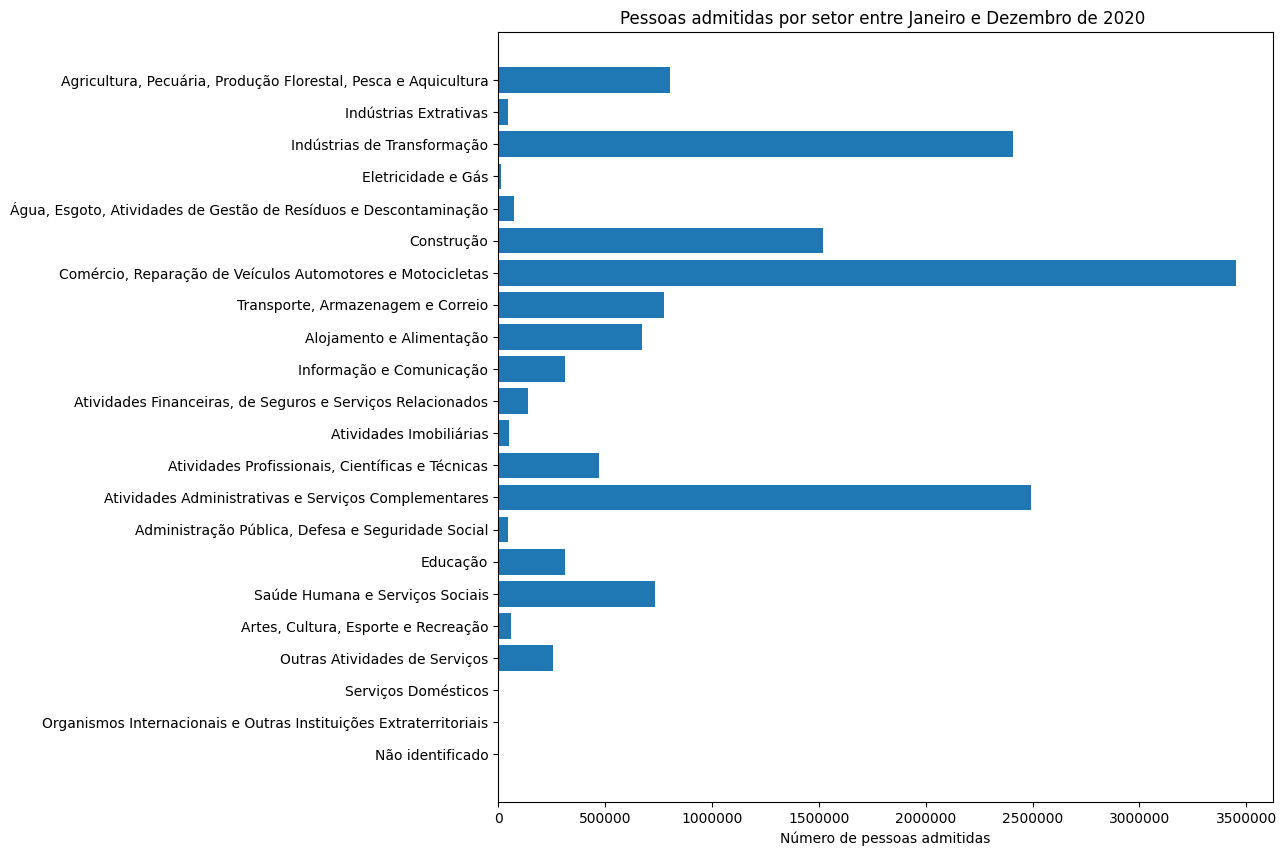

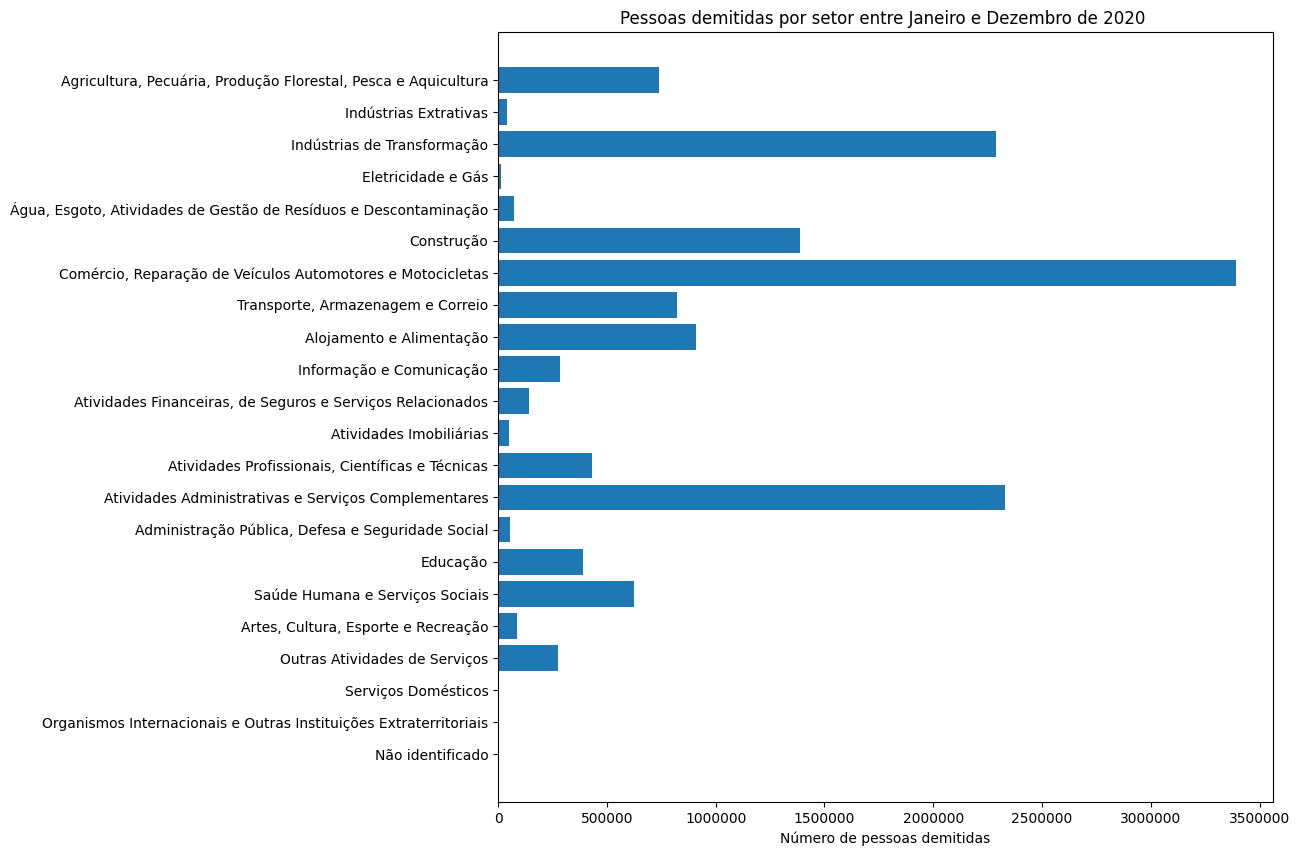

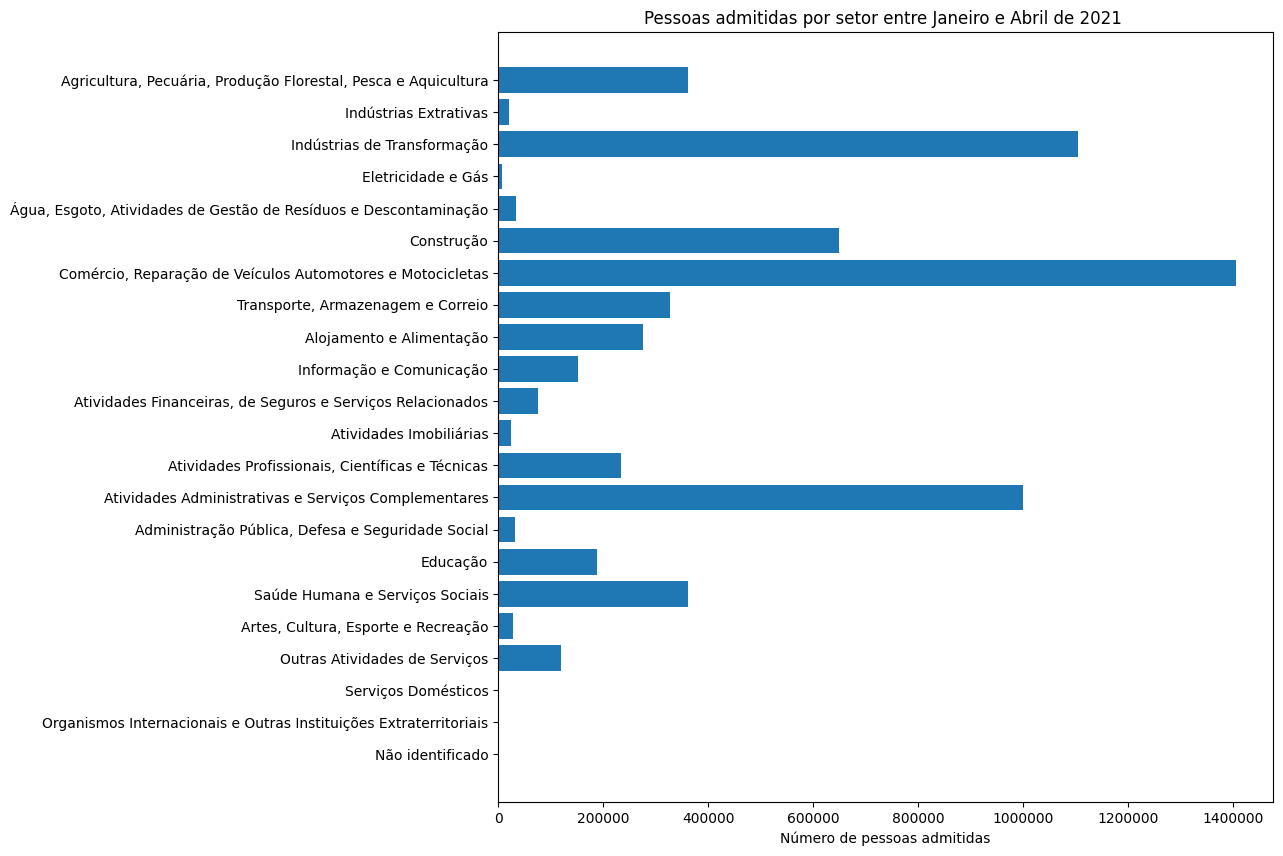

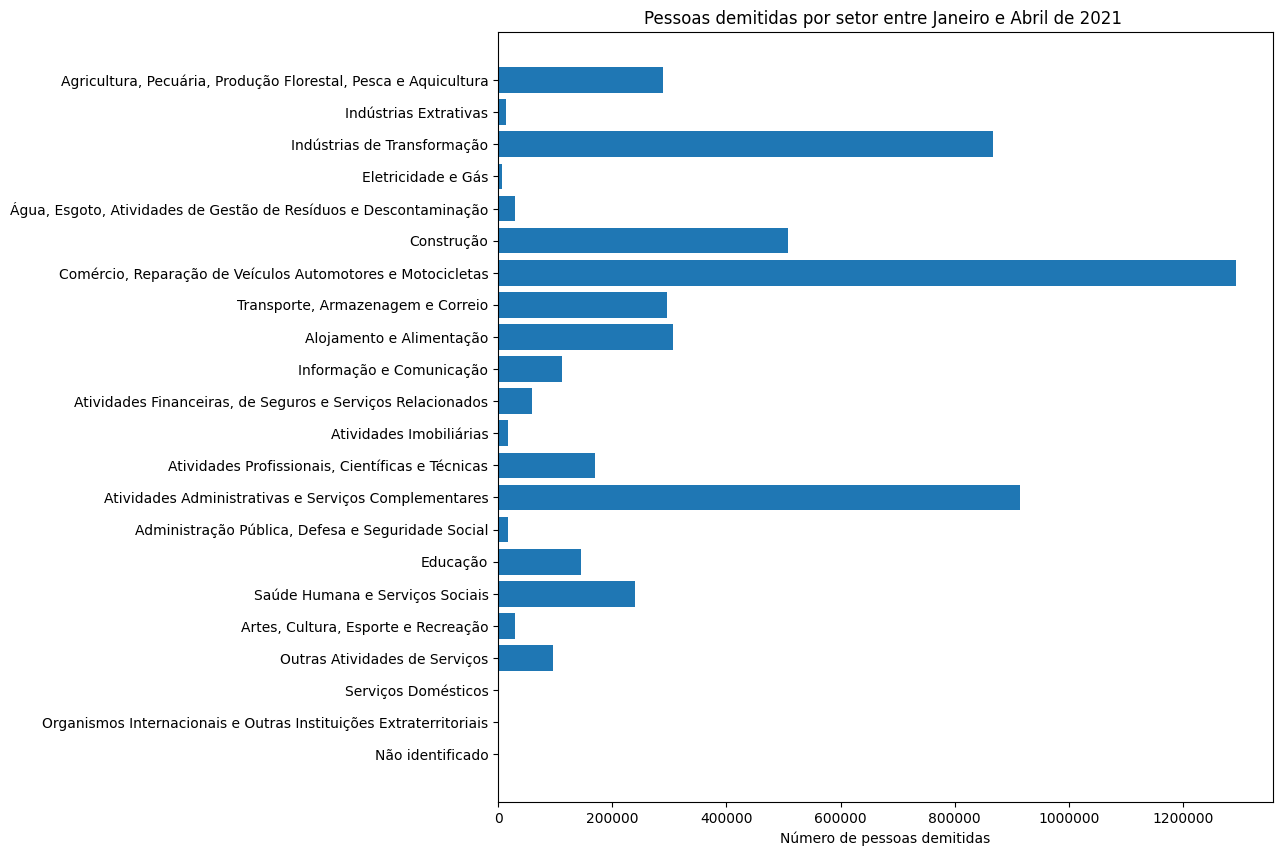

In [33]:


def plotGraficoSecao(lista,xlabel,title,tamanhox,tamanhoy,secoes):
    pessoas = {}
    for s in secoes:
        pessoas[s] = 0
    for l in lista:
        for secao,qtd_pessoas in l.items():
            pessoas[secao]+=qtd_pessoas
            
    plt.rcdefaults()
    fig, ax = plt.subplots()
    y_pos = np.arange(len(pessoas.keys()))
    grafico = []
    for secao,qtd_pessoas in pessoas.items():
        grafico.append(qtd_pessoas)
    ax.barh(y_pos,grafico, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(pessoas.keys())
    ax.invert_yaxis() 
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    fig.set_size_inches(tamanhox, tamanhoy)
    plt.ticklabel_format(style='plain', axis='x')

    plt.show()
sec_antigas = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','Z']
sec_novas = ["Agricultura, Pecuária, Produção Florestal, Pesca e Aquicultura","Indústrias Extrativas","Indústrias de Transformação","Eletricidade e Gás","Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação","Construção","Comércio, Reparação de Veículos Automotores e Motocicletas","Transporte, Armazenagem e Correio","Alojamento e Alimentação","Informação e Comunicação","Atividades Financeiras, de Seguros e Serviços Relacionados","Atividades Imobiliárias","Atividades Profissionais, Científicas e Técnicas","Atividades Administrativas e Serviços Complementares","Administração Pública, Defesa e Seguridade Social","Educação","Saúde Humana e Serviços Sociais","Artes, Cultura, Esporte e Recreação","Outras Atividades de Serviços","Serviços Domésticos","Organismos Internacionais e Outras Instituições Extraterritoriais","Não identificado"]
pessoasAdmitidasSetor2020 = []
pessoasDemitidasSetor2020 = []

pessoasAdmitidasSetor2021 = []
pessoasDemitidasSetor2021 = []

for mes in movimento2020:
    pessoasAdmitidasSetor2020.append(movimento2020[mes].replace(sec_antigas, sec_novas).loc[movimento2020[mes]['tipomovimentação'].isin(cod_admitidos)]['seção'].value_counts().to_dict())
    pessoasDemitidasSetor2020.append(movimento2020[mes].replace(sec_antigas, sec_novas).loc[movimento2020[mes]['tipomovimentação'].isin(cod_demitidos)]['seção'].value_counts().to_dict())

for mes in movimento2021:
    pessoasAdmitidasSetor2021.append(movimento2021[mes].replace(sec_antigas, sec_novas).loc[movimento2021[mes]['tipomovimentação'].isin(cod_admitidos)]['seção'].value_counts().to_dict())
    pessoasDemitidasSetor2021.append(movimento2021[mes].replace(sec_antigas, sec_novas).loc[movimento2021[mes]['tipomovimentação'].isin(cod_demitidos)]['seção'].value_counts().to_dict())

plotGraficoSecao(pessoasAdmitidasSetor2020,'Número de pessoas admitidas','Pessoas admitidas por setor entre Janeiro e Dezembro de 2020 ',10,10,sec_novas)
plotGraficoSecao(pessoasDemitidasSetor2020,'Número de pessoas demitidas','Pessoas demitidas por setor entre Janeiro e Dezembro de 2020 ',10,10,sec_novas)
plotGraficoSecao(pessoasAdmitidasSetor2021,'Número de pessoas admitidas','Pessoas admitidas por setor entre Janeiro e Abril de 2021 ',10,10,sec_novas)
plotGraficoSecao(pessoasDemitidasSetor2021,'Número de pessoas demitidas','Pessoas demitidas por setor entre Janeiro e Abril de 2021 ',10,10,sec_novas)